In [70]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

from catboost import CatBoostRegressor

In [71]:
df = pd.read_csv("Data/covid.csv")

# Data Exploration

In [72]:
df.shape

(566602, 23)

In [73]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [74]:
df.head(15)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2
5,1beec8,2,2,16-04-2020,16-04-2020,29-04-2020,2,1,47,97,...,2,2,2,2,2,2,2,99,1,1
6,1.75E+56,2,2,22-04-2020,13-04-2020,9999-99-99,2,2,63,97,...,2,1,2,2,2,2,2,99,1,2
7,0ce1f5,1,1,21-05-2020,18-05-2020,9999-99-99,97,2,56,2,...,2,1,2,2,2,1,1,1,1,97
8,12b57a,1,1,22-04-2020,18-04-2020,9999-99-99,97,2,41,2,...,2,2,2,2,2,2,2,99,1,97
9,006b91,1,2,23-04-2020,18-04-2020,9999-99-99,1,1,39,2,...,2,2,2,2,1,2,2,99,1,2


In [75]:
df.isnull().sum()

id                     0
sex                    0
patient_type           0
entry_date             0
date_symptoms          0
date_died              0
intubed                0
pneumonia              0
age                    0
pregnancy              0
diabetes               0
copd                   0
asthma                 0
inmsupr                0
hypertension           0
other_disease          0
cardiovascular         0
obesity                0
renal_chronic          0
tobacco                0
contact_other_covid    0
covid_res              0
icu                    0
dtype: int64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

In [77]:
# How many female patients are pregnant

x = df.loc[(df.sex == 1) & (df.pregnancy == 1)]
print(len(x))

4063


In [78]:
# How many Covid positive patients were tobacco users

x = df.loc[(df.covid_res == 2) & (df.tobacco == 1)]
print(len(x))

25846


# Finding value counts of categorical variables

CLAVE	DESCRIPCIÓN
1	YES
2	NO
97	Not Applicable
98	Ignore
99	Not Specified

1	Female
2	Male
99	Not Specified

In [79]:
# Create a subset of categorical variables only
subset = df.drop(columns= ['date_died', 'entry_date', 'date_symptoms', 'id', 'age'])

In [80]:
for col in subset.columns:
    print(subset[col].value_counts())

2    287112
1    279490
Name: sex, dtype: int64
1    444689
2    121913
Name: patient_type, dtype: int64
97    444689
2     111824
1       9965
99       124
Name: intubed, dtype: int64
2     478416
1      88175
99        11
Name: pneumonia, dtype: int64
97    287112
2     273840
1       4063
98      1587
Name: pregnancy, dtype: int64
2     493790
1      70831
98      1981
Name: diabetes, dtype: int64
2     555723
1       9130
98      1749
Name: copd, dtype: int64
2     546824
1      18026
98      1752
Name: asthma, dtype: int64
2     555644
1       8978
98      1980
Name: inmsupr, dtype: int64
2     472270
1      92508
98      1824
Name: hypertension, dtype: int64
2     546920
1      17084
98      2598
Name: other_disease, dtype: int64
2     552005
1      12775
98      1822
Name: cardiovascular, dtype: int64
2     472549
1      92272
98      1781
Name: obesity, dtype: int64
2     553560
1      11250
98      1792
Name: renal_chronic, dtype: int64
2     516678
1      48017
98      1907
N

In [81]:
# Removing rows that have covid_res= 3 meaning 'pending'
index_names = df[ df['covid_res'] == 3 ].index
df.drop(index_names, inplace = True)

In [82]:
# Checking value_counts of covid_res column
df['covid_res'].value_counts()

2    279035
1    220657
Name: covid_res, dtype: int64

In [83]:
# Change date_died column to categorical data "9999-99-99" to 0 and row with date to 1
df.loc[df.date_died == "9999-99-99", "date_died"] = 0

In [84]:
df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,0,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,0,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,0,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,0,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2


In [85]:
df.loc[df.date_died != 0, "date_died"] = 1

In [86]:
df.head(10)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,0,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,0,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,0,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,0,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,1,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2
5,1beec8,2,2,16-04-2020,16-04-2020,1,2,1,47,97,...,2,2,2,2,2,2,2,99,1,1
6,1.75E+56,2,2,22-04-2020,13-04-2020,0,2,2,63,97,...,2,1,2,2,2,2,2,99,1,2
7,0ce1f5,1,1,21-05-2020,18-05-2020,0,97,2,56,2,...,2,1,2,2,2,1,1,1,1,97
8,12b57a,1,1,22-04-2020,18-04-2020,0,97,2,41,2,...,2,2,2,2,2,2,2,99,1,97
9,006b91,1,2,23-04-2020,18-04-2020,0,1,1,39,2,...,2,2,2,2,1,2,2,99,1,2


In [87]:
df['date_died'].value_counts()

0    465571
1     34121
Name: date_died, dtype: int64

In [88]:
df["date_died"] = df["date_died"].astype("int64")

# Visualization

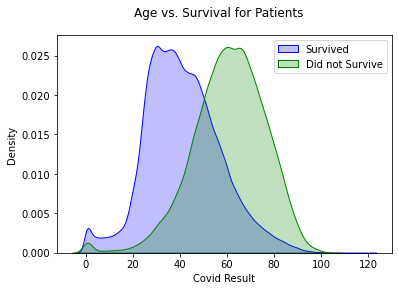

In [89]:
# Plotting Age vs Survival rate of Patients Admitted to the hospital
fig, ax = plt.subplots()

sns.kdeplot(df[df["date_died"]==0]["age"], shade=True, color="blue", label="Survived", ax=ax)
sns.kdeplot(df[df["date_died"]==1]["age"], shade=True, color="green", label="Did not Survive", ax=ax)

ax.legend()
ax.set_xlabel("Covid Result")
ax.set_ylabel("Density")

fig.suptitle("Age vs. Survival for Patients");
plt.savefig('output.png', dpi=300, bbox_inches='tight')

# We see from the above graph that Age cannot be considered a factor for Covid deaths

[Text(0, 0, 'positive'), Text(1, 0, 'not positive')]

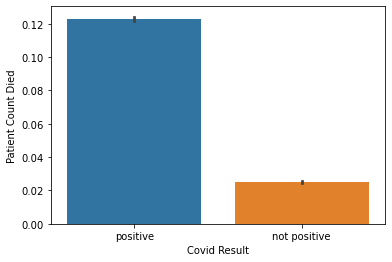

In [90]:
# Plotting Patient Count Died versus Covid Result
ax = sns.barplot(x="covid_res", y="date_died", data=df)
ax.set_xlabel("Covid Result")
ax.set_ylabel("Patient Count Died")
ax.set_xticklabels(["positive", "not positive"])

In [91]:
# To get data only for patients that died to build visuals -- Anshu
filter_df_death = df[df['date_died'] == 1] 
filter_df_death

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
4,0d01b5,1,2,13-04-2020,13-04-2020,1,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2
5,1beec8,2,2,16-04-2020,16-04-2020,1,2,1,47,97,...,2,2,2,2,2,2,2,99,1,1
24,008b81,1,1,15-05-2020,06-05-2020,1,97,2,61,2,...,2,1,2,2,2,2,2,1,1,97
36,17394f,2,2,27-04-2020,27-04-2020,1,2,1,77,97,...,2,1,2,2,2,2,2,99,1,2
41,006ddc,1,2,26-04-2020,23-04-2020,1,2,1,53,2,...,2,2,2,2,1,2,2,99,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499540,16d102,2,2,17-06-2020,17-06-2020,1,2,1,73,97,...,2,2,2,1,2,1,1,99,2,2
499574,105f35,2,2,28-03-2020,27-03-2020,1,2,1,55,97,...,1,2,1,2,2,2,1,99,2,2
499582,02e521,2,2,29-04-2020,27-04-2020,1,2,1,37,97,...,2,1,2,2,2,2,2,2,2,2
499606,16ca9a,2,2,31-03-2020,30-03-2020,1,2,1,84,97,...,2,2,1,1,2,1,2,99,2,2


[Text(0, 0, 'positive'), Text(1, 0, 'not positive')]

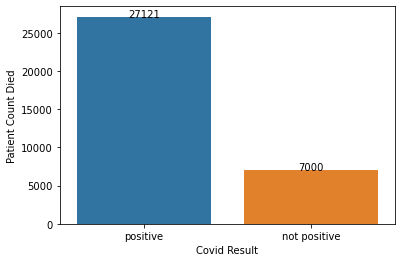

In [92]:
# Plotting Patient Count Died versus Covid Result and showing the count on top of bars -- Anshu
groupedvalues = filter_df_death.groupby('covid_res').sum().reset_index()
groupedvalues.head()

gx =sns.barplot(x='covid_res',y='date_died',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    gx.text(row.name,row.date_died, round(row.date_died,2), color='black', ha="center")
    
gx.set_xlabel("Covid Result")
gx.set_ylabel("Patient Count Died")
gx.set_xticklabels(["positive", "not positive"])

[Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'NA')]

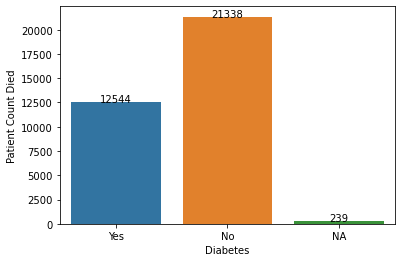

In [93]:
# Plotting Patient Count Died based on diabetes result and showing the count on top of bars -- Anshu
groupedvalues = filter_df_death.groupby('diabetes').sum().reset_index()
groupedvalues.head()

gxd =sns.barplot(x='diabetes',y='date_died',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    gxd.text(row.name,row.date_died, round(row.date_died,2), color='black', ha="center")
    
gxd.set_xlabel("Diabetes")
gxd.set_ylabel("Patient Count Died")
gxd.set_xticklabels(["Yes", "No", "NA"])

[Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'NA')]

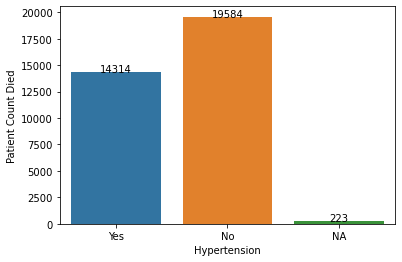

In [94]:
# Plotting Patient Count Died based on hypertension result and showing the count on top of bars -- Anshu
groupedvalues = filter_df_death.groupby('hypertension').sum().reset_index()
groupedvalues.head()

gxd =sns.barplot(x='hypertension',y='date_died',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    gxd.text(row.name,row.date_died, round(row.date_died,2), color='black', ha="center")
    
gxd.set_xlabel("Hypertension")
gxd.set_ylabel("Patient Count Died")
gxd.set_xticklabels(["Yes", "No", "NA"])

[Text(0, 0, 'Yes'),
 Text(1, 0, 'No'),
 Text(2, 0, 'NA'),
 Text(3, 0, 'Not Provided')]

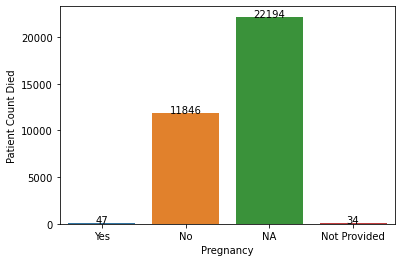

In [95]:
# Plotting Patient Count Died based on pregnancy result and showing the count on top of bars -- Anshu
groupedvalues = filter_df_death.groupby('pregnancy').sum().reset_index()
groupedvalues.head()

gxd =sns.barplot(x='pregnancy',y='date_died',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    gxd.text(row.name,row.date_died, round(row.date_died,2), color='black', ha="center")
    
gxd.set_xlabel("Pregnancy")
gxd.set_ylabel("Patient Count Died")
gxd.set_xticklabels(["Yes", "No", "NA", "Not Provided"])

[Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'Not Provided')]

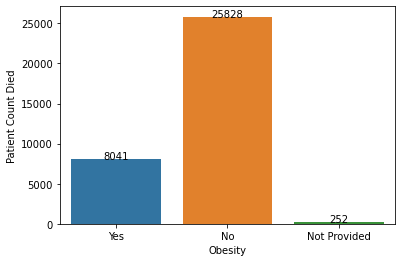

In [96]:
# Plotting Patient Count Died based on obesity and showing the count on top of bars -- Anshu
groupedvalues = filter_df_death.groupby('obesity').sum().reset_index()
groupedvalues.head()

gxd =sns.barplot(x='obesity',y='date_died',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    gxd.text(row.name,row.date_died, round(row.date_died,2), color='black', ha="center")
    
gxd.set_xlabel("Obesity")
gxd.set_ylabel("Patient Count Died")
gxd.set_xticklabels(["Yes", "No", "Not Provided"])

Text(0, 0.5, 'Patient Count Died')

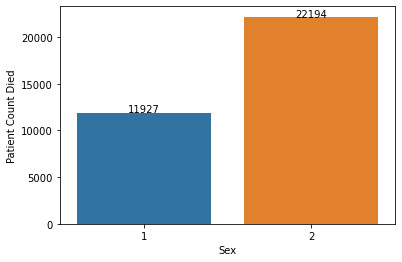

In [97]:
# Plotting Patient Count Died based on sex and showing the count on top of bars -- Anshu
groupedvalues = filter_df_death.groupby('sex').sum().reset_index()
groupedvalues.head()

gxd =sns.barplot(x='sex',y='date_died',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    gxd.text(row.name,row.date_died, round(row.date_died,2), color='black', ha="center")
    
gxd.set_xlabel("Sex")
gxd.set_ylabel("Patient Count Died")
#gxd.set_xticklabels(["Yes", "No", "Not Provided"])

In [98]:
# Create new dataframe with only pre-existing conditions for patients who died
pre_existing_df_died = filter_df_death.drop(columns= ['sex', 'icu', 'covid_res', 'contact_other_covid', 'intubed', 'patient_type'])
pre_existing_df_died = pre_existing_df_died[pre_existing_df_died['date_died'] == 1] 
pre_existing_df_died = pre_existing_df_died.drop(columns= ['id','entry_date','date_symptoms','date_died','age'])
pre_existing_df_died

,pneumonia,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco
4,2,2,1,2,2,2,1,2,1,2,2,2
5,1,97,1,2,2,2,2,2,2,2,2,2
24,2,2,2,2,2,2,1,2,2,2,2,2
36,1,97,2,2,2,2,1,2,2,2,2,2
41,1,2,1,2,2,2,2,2,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
499540,1,97,2,2,2,2,2,2,1,2,1,1
499574,1,97,1,2,2,1,2,1,2,2,2,1
499582,1,97,2,2,2,2,1,2,2,2,2,2
499606,1,97,2,2,2,2,2,1,1,2,1,2


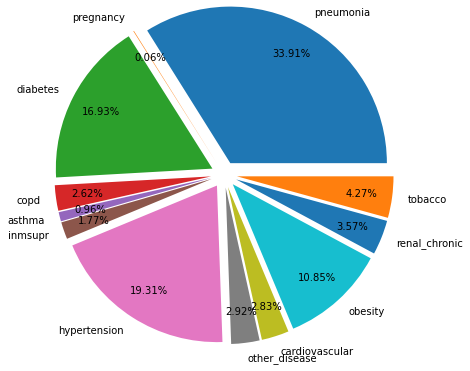

In [99]:
# Plotting precentage of pre-exsiting conditions in the dataset where patient actually died -- Anshu
pre_existing_count_died = []
pre_existing_labels_died = []
for col in pre_existing_df_died.columns:
    pre_existing_count_died.append(len(pre_existing_df_died[pre_existing_df_died[col] == 1].index))
    pre_existing_labels_died.append(col)
fig, ax = plt.subplots(figsize=(3, 3))
ax.pie(pre_existing_count_died, labels=pre_existing_labels_died, autopct='%.2f%%', 
        pctdistance = 0.8,
        explode=[0.2]*12, 
        radius = 2.4)
#ax.set_title('Pre-existing Conditions')
plt.show()

[Text(0, 0, 'positive'), Text(1, 0, 'not positive')]

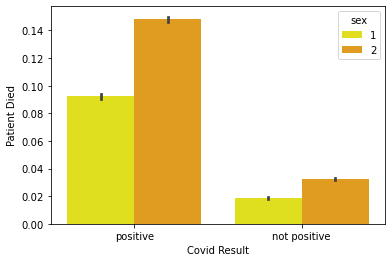

In [100]:
# Plotting Male/Female Patient Count Died vs Covid Result"
ax = sns.barplot(x="covid_res", y="date_died", hue="sex", palette={1:"yellow", 2:"orange"}, data=df)
ax.set_xlabel("Covid Result")
ax.set_ylabel("Patient Died")
ax.set_xticklabels(["positive", "not positive"])

In [101]:
# Create new dataframe with only pre-existing conditions
pre_existing_df = subset.drop(columns= ['sex', 'icu', 'covid_res', 'contact_other_covid', 'intubed', 'patient_type'])
pre_existing_df

,pneumonia,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco
0,2,97,2,2,2,2,2,2,2,2,2,2
1,2,97,2,2,2,2,2,2,2,2,2,2
2,2,2,2,2,2,2,2,2,2,1,2,2
3,1,97,2,2,2,2,2,2,2,2,2,2
4,2,2,1,2,2,2,1,2,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
566597,2,97,1,2,2,2,2,2,2,2,2,2
566598,2,2,2,2,2,2,2,2,2,2,2,2
566599,1,2,2,2,2,2,2,2,2,1,2,2
566600,1,2,2,2,2,2,2,2,2,2,2,2


In [102]:
# len(df[df.sex == 1].index)
pre_existing_count = []
pre_existing_labels = []
for col in pre_existing_df.columns:
    pre_existing_count.append(len(pre_existing_df[pre_existing_df[col] == 1].index))
    pre_existing_labels.append(col)

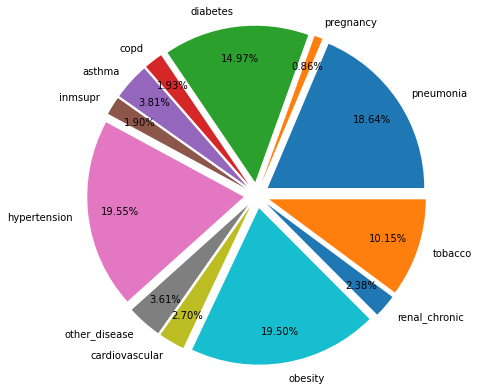

In [103]:
# Plotting precentage of pre-exsiting conditions in the dataset
fig, ax = plt.subplots(figsize=(3, 3))
ax.pie(pre_existing_count, labels=pre_existing_labels, autopct='%.2f%%', 
        pctdistance = 0.8,
        explode=[0.2]*12, 
        radius = 2.4)
#ax.set_title('Pre-existing Conditions')
plt.show()

# Plotting Patient who were in contact with other covid patients versus Covid Result
# Top three pre-existing conditions have the count of death

Text(0.5, 0, 'Diabetes')

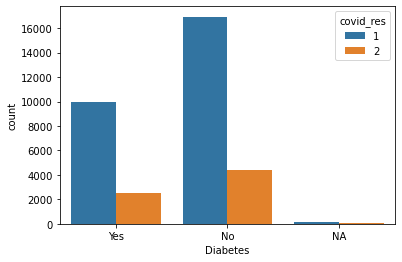

In [104]:
# Plotting Patient Count Died versus pre-existing condition for diabetes and covid result -- Anshu
ax = sns.countplot(x="diabetes", hue="covid_res", data=filter_df_death)
ax.set_xticklabels(["Yes", "No", "NA"])
ax.set_xlabel("Diabetes")

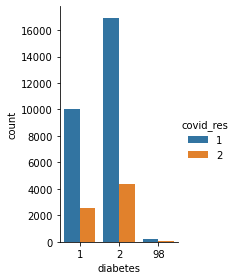

In [106]:
# Sample use of catplot -- Anshu
ct = sns.catplot(x="diabetes", hue="covid_res",data=filter_df_death, kind="count", height=4, aspect=.7);

# Machine Learning

In [38]:
df = df.sample(n=10000)

In [107]:
# Create our features
# X = df.drop(columns= ['date_died', 'entry_date', 'date_symptoms', 'id', 'age'])
X = df.drop(columns= ['covid_res', 'date_died', 'entry_date', 'date_symptoms', 'id', 'age', 'patient_type', 
                      'intubed', 'icu', 'pneumonia','other_disease','sex'])

# Create our target
y = df['date_died']
#y = df['covid_res']

In [108]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.9, random_state=123, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(449722, 11) (49970, 11) (449722,) (49970,)


In [109]:
X.dtypes

pregnancy              int64
diabetes               int64
copd                   int64
asthma                 int64
inmsupr                int64
hypertension           int64
cardiovascular         int64
obesity                int64
renal_chronic          int64
tobacco                int64
contact_other_covid    int64
dtype: object

In [110]:
categorical_features_indices = np.where(X.dtypes != np.float64)[0]
categorical_features_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [111]:
y.value_counts()

0    465571
1     34121
Name: date_died, dtype: int64

# Cat Boost Classifier

In [112]:
X.dtypes

pregnancy              int64
diabetes               int64
copd                   int64
asthma                 int64
inmsupr                int64
hypertension           int64
cardiovascular         int64
obesity                int64
renal_chronic          int64
tobacco                int64
contact_other_covid    int64
dtype: object

In [113]:
#List of categorical columns
categoricalcolumns = X.select_dtypes(include=["object"]).columns.tolist()
print("Names of categorical columns : ", categoricalcolumns)
#Get location of categorical columns
cat_features = [X.columns.get_loc(col) for col in categoricalcolumns]
print("Location of categorical columns : ",cat_features)

Names of categorical columns :  []
Location of categorical columns :  []


In [114]:
reg_model=CatBoostRegressor(iterations=50, depth=10, learning_rate=0.1, loss_function='RMSE')
reg_model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.2512780	test: 0.2512562	best: 0.2512562 (0)	total: 81.7ms	remaining: 4s
1:	learn: 0.2496916	test: 0.2496398	best: 0.2496398 (1)	total: 174ms	remaining: 4.17s
2:	learn: 0.2484077	test: 0.2483160	best: 0.2483160 (2)	total: 211ms	remaining: 3.3s
3:	learn: 0.2473637	test: 0.2472375	best: 0.2472375 (3)	total: 248ms	remaining: 2.85s
4:	learn: 0.2465121	test: 0.2463572	best: 0.2463572 (4)	total: 283ms	remaining: 2.55s
5:	learn: 0.2458227	test: 0.2456420	best: 0.2456420 (5)	total: 332ms	remaining: 2.44s
6:	learn: 0.2448863	test: 0.2446674	best: 0.2446674 (6)	total: 428ms	remaining: 2.63s
7:	learn: 0.2441164	test: 0.2438765	best: 0.2438765 (7)	total: 496ms	remaining: 2.6s
8:	learn: 0.2434927	test: 0.2432343	best: 0.2432343 (8)	total: 548ms	remaining: 2.5s
9:	learn: 0.2429851	test: 0.2427125	best: 0.2427125 (9)	total: 611ms	remaining: 2.44s
10:	learn: 0.2425782	test: 0.2422889	best: 0.2422889 (10)	total: 663ms	remaining: 2.35s
11:	learn: 0.2422415	test: 0.2419457	best: 0.2419457 (11)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'diabetes'),
  Text(1, 0, 'contact_other_covid'),
  Text(2, 0, 'hypertension'),
  Text(3, 0, 'pregnancy'),
  Text(4, 0, 'copd'),
  Text(5, 0, 'renal_chronic'),
  Text(6, 0, 'obesity'),
  Text(7, 0, 'cardiovascular'),
  Text(8, 0, 'inmsupr'),
  Text(9, 0, 'asthma'),
  Text(10, 0, 'tobacco')])

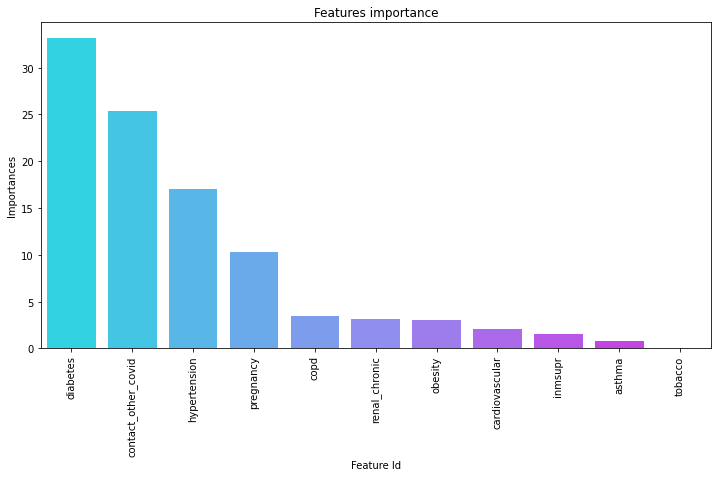

In [115]:
# Create a dataframe of feature importance 
df_feature_importance = pd.DataFrame(reg_model.get_feature_importance(prettified=True))
#plotting feature importance
plt.figure(figsize=(12, 6));
feature_plot= sns.barplot(x="Feature Id", y="Importances", data=df_feature_importance,palette="cool");
plt.title('Features importance');
plt.xticks(rotation=90)

In [116]:
from catboost import CatBoostClassifier

In [117]:
cat_features_index = np.where(X.dtypes != float)[0]
cat_features_index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [118]:
# cat_model = CatBoostClassifier(custom_loss=['Accuracy'],random_seed=42)
cat_model = CatBoostClassifier(iterations=100, verbose=10)


## Set the metric for evaluation -- original code
# cat_model = CatBoostClassifier(eval_metric='Accuracy', use_best_model=True,  random_seed=42) 

cat_model.fit(X_train, y_train, cat_features=cat_features_index, eval_set=(X_test, y_test), plot=True)

# model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.390109
0:	learn: 0.4547624	test: 0.4547535	best: 0.4547535 (0)	total: 67.2ms	remaining: 6.65s
10:	learn: 0.2109463	test: 0.2106752	best: 0.2106752 (10)	total: 552ms	remaining: 4.47s
20:	learn: 0.2052799	test: 0.2060773	best: 0.2060773 (20)	total: 1.22s	remaining: 4.59s
30:	learn: 0.2049208	test: 0.2058906	best: 0.2058906 (30)	total: 1.83s	remaining: 4.08s
40:	learn: 0.2047363	test: 0.2057823	best: 0.2057823 (40)	total: 2.44s	remaining: 3.52s
50:	learn: 0.2046648	test: 0.2057817	best: 0.2057717 (41)	total: 3.04s	remaining: 2.92s
60:	learn: 0.2046379	test: 0.2057691	best: 0.2057689 (59)	total: 3.67s	remaining: 2.35s
70:	learn: 0.2045712	test: 0.2057589	best: 0.2057589 (70)	total: 4.26s	remaining: 1.74s
80:	learn: 0.2044985	test: 0.2057659	best: 0.2057496 (74)	total: 4.89s	remaining: 1.15s
90:	learn: 0.2044537	test: 0.2057356	best: 0.2057322 (89)	total: 5.5s	remaining: 544ms
99:	learn: 0.2044385	test: 0.2057329	best: 0.2057322 (89)	total: 6.08s	remaining: 0us

bestT

In [119]:
print(cat_model.predict_proba(X_test))

[[0.85365228 0.14634772]
 [0.98959622 0.01040378]
 [0.97858089 0.02141911]
 ...
 [0.97858089 0.02141911]
 [0.99224542 0.00775458]
 [0.97858089 0.02141911]]


In [120]:
print(cat_model.predict(X_test))

[0 0 0 ... 0 0 0]


In [121]:
test_preds = cat_model.predict(X_test)
train_preds = cat_model.predict(X_train)

print("\nTest  Accuracy : %.2f"%cat_model.score(X_test, y_test))
print("Train Accuracy : %.2f"%cat_model.score(X_train, y_train))


Test  Accuracy : 0.93
Train Accuracy : 0.93


In [122]:
from catboost import cv
from sklearn.metrics import accuracy_score

print('the test accuracy is :{:.6f}'.format(accuracy_score(y_test, cat_model.predict(X_test))))

the test accuracy is :0.931719


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'contact_other_covid'),
  Text(1, 0, 'hypertension'),
  Text(2, 0, 'diabetes'),
  Text(3, 0, 'pregnancy'),
  Text(4, 0, 'obesity'),
  Text(5, 0, 'copd'),
  Text(6, 0, 'renal_chronic'),
  Text(7, 0, 'cardiovascular'),
  Text(8, 0, 'inmsupr'),
  Text(9, 0, 'asthma'),
  Text(10, 0, 'tobacco')])

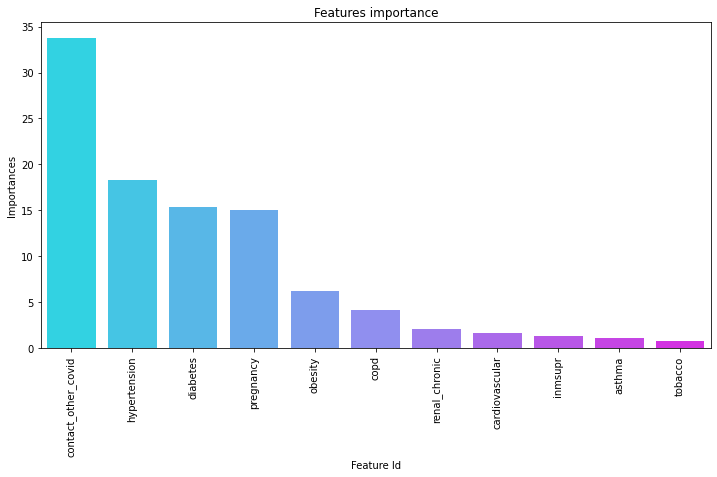

In [123]:
# Create a dataframe of feature importance 
df_feature_importance = pd.DataFrame(cat_model.get_feature_importance(prettified=True))
#plotting feature importance
plt.figure(figsize=(12, 6));
feature_plot= sns.barplot(x="Feature Id", y="Importances", data=df_feature_importance,palette="cool");
plt.title('Features importance');
plt.xticks(rotation=90)

In [124]:
cat_model_new = CatBoostClassifier(
    iterations=100,
    random_seed=123,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy']
)

cat_model_new.fit(
    X_train, y_train,
    cat_features=cat_features_index,
    eval_set=(X_test, y_test),
    verbose=True,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.4072414	test: 0.4073602	best: 0.4073602 (0)	total: 77.5ms	remaining: 7.67s
1:	learn: 0.3082735	test: 0.3083662	best: 0.3083662 (1)	total: 161ms	remaining: 7.89s
2:	learn: 0.2656080	test: 0.2656417	best: 0.2656417 (2)	total: 206ms	remaining: 6.67s
3:	learn: 0.2470113	test: 0.2469785	best: 0.2469785 (3)	total: 238ms	remaining: 5.7s
4:	learn: 0.2313212	test: 0.2314578	best: 0.2314578 (4)	total: 296ms	remaining: 5.62s
5:	learn: 0.2194610	test: 0.2193998	best: 0.2193998 (5)	total: 363ms	remaining: 5.69s
6:	learn: 0.2153818	test: 0.2152022	best: 0.2152022 (6)	total: 406ms	remaining: 5.39s
7:	learn: 0.2111798	test: 0.2110424	best: 0.2110424 (7)	total: 469ms	remaining: 5.39s
8:	learn: 0.2093385	test: 0.2093178	best: 0.2093178 (8)	total: 536ms	remaining: 5.42s
9:	learn: 0.2077981	test: 0.2080781	best: 0.2080781 (9)	total: 605ms	remaining: 5.44s
10:	learn: 0.2070215	test: 0.2076062	best: 0.2076062 (10)	total: 667ms	remaining: 5.39s
11:	learn: 0.2065554	test: 0.2072340	best: 0.2072340

95:	learn: 0.2041383	test: 0.2056925	best: 0.2056747 (78)	total: 6.79s	remaining: 283ms
96:	learn: 0.2041366	test: 0.2056922	best: 0.2056747 (78)	total: 6.87s	remaining: 213ms
97:	learn: 0.2041354	test: 0.2056905	best: 0.2056747 (78)	total: 6.98s	remaining: 142ms
98:	learn: 0.2041354	test: 0.2056904	best: 0.2056747 (78)	total: 7.08s	remaining: 71.5ms
99:	learn: 0.2041352	test: 0.2056912	best: 0.2056747 (78)	total: 7.17s	remaining: 0us

bestTest = 0.2056747131
bestIteration = 78

Shrink model to first 79 iterations.


In [125]:
from catboost import cv
from sklearn.metrics import accuracy_score

print('the test accuracy is :{:.6f}'.format(accuracy_score(y_test, cat_model_new.predict(X_test))))

the test accuracy is :0.931639


In [126]:
test_preds = cat_model_new.predict(X_test)
train_preds = cat_model_new.predict(X_train)

print("\nTest  Accuracy : %.2f"%cat_model_new.score(X_test, y_test))
print("Train Accuracy : %.2f"%cat_model_new.score(X_train, y_train))


Test  Accuracy : 0.93
Train Accuracy : 0.93


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'contact_other_covid'),
  Text(1, 0, 'hypertension'),
  Text(2, 0, 'diabetes'),
  Text(3, 0, 'pregnancy'),
  Text(4, 0, 'obesity'),
  Text(5, 0, 'copd'),
  Text(6, 0, 'renal_chronic'),
  Text(7, 0, 'cardiovascular'),
  Text(8, 0, 'inmsupr'),
  Text(9, 0, 'asthma'),
  Text(10, 0, 'tobacco')])

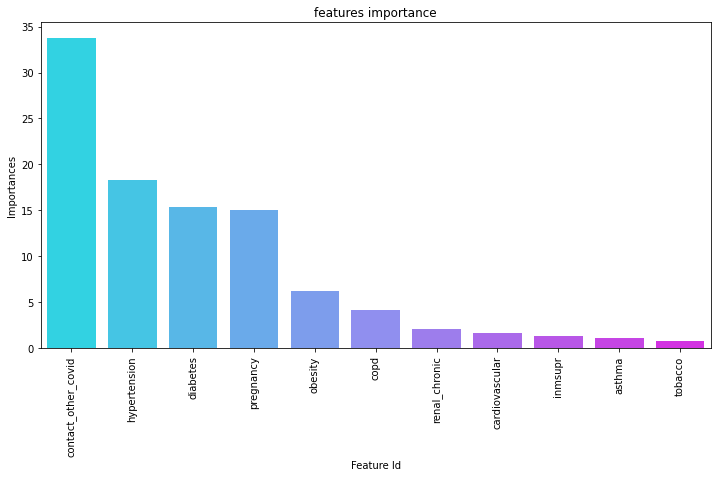

In [127]:
# Create a dataframe of feature importance 
df_feature_importance = pd.DataFrame(cat_model.get_feature_importance(prettified=True))
#plotting feature importance
plt.figure(figsize=(12, 6));
# horizontal
# feature_plot= sns.barplot(x="Importances", y="Feature Id", data=df_feature_importance,palette="cool");
# vertical
feature_plot= sns.barplot(x="Feature Id", y="Importances", data=df_feature_importance,palette="cool");
plt.title('features importance');
plt.xticks(rotation=90)

In [128]:
df_feature_importance

,Feature Id,Importances
0,contact_other_covid,33.773530
1,hypertension,18.258893
2,diabetes,15.419741
3,pregnancy,15.007511
4,obesity,6.195345
5,copd,4.214991
6,renal_chronic,2.158601
7,cardiovascular,1.657705
8,inmsupr,1.376080
9,asthma,1.083239
